# Assignment 6

Partner - Sricharraan Ramaswamy

This work is solely ours and the whole assignment was done in each other presence

# Problem 1:

*1. initializing each Gaussian*  

In this problem, A small gaussian distribution was taken using make_blobls from sklearn of 20 samples, 3 features and 3 clusters.All the three parameters mean, covariance and priors have been intialiased as follows:   
1) Mean: For 3 clusters/centers, the mean of 20 samples with 3*3 with the rows be no. of clusters and columns being the features.   
2) Covariance: Covariance is k matrix where each k has a d X d dimension(d= number of features). A nested 3*3 matrix with a 3*3 matrix as 3 being clusters and 3 features for the inside matrix. Also, an identity matrix has being intialized as the covariance for starters    
3) Priors: A k sized vector has been intialized with with each value being 1/k.   

*2. deciding ties* 
The maximumization step and upodation step in the while loop plays a major role the maximization step updates the weight for the best possible covergence which then updated accordingly in the covariance, mean and priors valuers.

*3. stopping criteria*  
The last if stated is the stopping criteria for the algorithm which says that error > epsilon where the initalized epsilon is 0.00001 and once the error is less than that there is convergence. The error is calculated with square and sum of the mean_squared_error  



In [2]:
from sklearn.datasets import make_blobs
from scipy.stats import multivariate_normal
import numpy as np
import random
import copy
n_features=3
centers=3
n_samples=10
X, y = make_blobs(n_samples=10,n_features=3, centers=3, random_state=0)
#X=np.array([[1.12031365, 5.75806083], [-0.49772229, 1.55128226], [1.9263585, 4.15243012], [2.49913075, 1.23133799], [3.54934659, 0.6925054], [1.7373078, 4.42546234], [2.91970372, 0.15549864], [2.84382807, 3.32650945], [0.87305123, 4.71438583], [2.36833522, 0.04356792]])
print(X)
mu=[]
for i in range(centers):
    j=random.randint(0,len(X)-1)
    mu.append(X[j])
P_of_C =[1/centers for i in range(centers)]
#covariance=[[[0 for k in range(centers)] for i in range(n_features)] for j in range(n_features)]
covariance=[[[1 if i==j else 0 for i in range(n_features) ]for j in range(n_features)]for k in range(centers)]
X_T=np.transpose(X)

weight=[[0 for i in range(centers)] for j in range(n_samples)]
#weight=[]
mu_new=[[0 for i in range(n_features)] for j in range(centers)]
mu_diff=[[0 for i in range(n_features)] for j in range(n_features)]
#mu_diff_T=[[0 for i in range(n_features)] for j in range(n_features)]
counter=0
mean_squared_error = 0
error = 999
epsilon = 0.0001
denom = [0 for i in range(centers)]
counter = 0
while error > epsilon:
    temp = 0
    for j in range(n_samples):
         for i in range(centers):
            likelihood = multivariate_normal.pdf(X[j],mean=mu[i],cov=covariance[i],allow_singular=True)
            weight[j][i]= likelihood * P_of_C[i]
            
    for j in range(n_samples):
            weight[j]= weight[j]/np.sum(weight[j])
    
    weight_transpose=np.transpose(weight)
    #print("weight transpose is",weight_transpose)
    mu_new=np.dot(weight_transpose,X)
    for i in range(centers):
        mu_new[i]=mu_new[i]/np.sum(weight_transpose[i])
        P_of_C[i] = np.sum(weight_transpose[i])/n_samples
        
    for i in range(centers):
        temp=0
        for j in range(n_samples):
            mu_diff=np.subtract(X[j],mu[i]).reshape(n_features,1)
            mu_diff_T= np.reshape(mu_diff,(1,n_features))
            temp += weight[j][i] * np.dot(mu_diff,mu_diff_T)
        covariance[i] = temp / np.sum(weight_transpose[i])
    
    mean_squared_error = np.subtract(mu,mu_new)
    
    #print("error 1",mean_squared_error)
    mu=copy.deepcopy(mu_new)
    mean_squared_error=np.square(mean_squared_error)
    #print("error 2",mean_squared_error)
    error = np.sum(mean_squared_error)
    counter+=1   
        
print("converged")    
print("count of iterations is",counter) 
    

[[ 0.33096604 -1.76905353  4.43227355]
 [ 0.56460626 -1.4795392   4.38062271]
 [-2.32653378  9.23093229 11.06073926]
 [ 2.05708199  4.78809948  2.634408  ]
 [ 0.93110259 -0.84633677  1.35438557]
 [-1.81777304  8.01084655  8.81074967]
 [ 2.24238861  3.79791079  4.6004683 ]
 [ 1.25146839  3.34303272  2.4321945 ]
 [ 0.79468751  5.71399196  1.68079583]
 [ 0.28677335  8.40190005  9.4225203 ]]
converged
count of iterations is 4


# Problem 2:




  
    
### For Ionosphere 



clusters= 2
clusters= 3
clusters= 4
clusters= 5


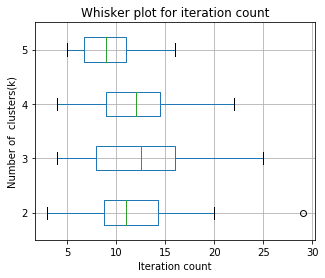

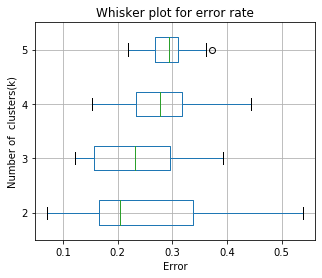

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

def expectation_maximization(X,n_samples,n_features,centers):
    P_of_C =[1/centers for i in range(centers)]
    covariance=[[[1 if i==j else 0 for i in range(n_features) ]for j in range(n_features)]for k in range(centers)]
    X_T=np.transpose(X)
    mu=[]
    for i in range(centers):
        j=random.randint(0,len(X)-1)
        mu.append(X[j])
    co=[[0 for i in range(centers)] for j in range(n_samples)]
    mu_new = [[0 for i in range(n_features)] for j in range(centers)]
    mu_diff=[[0 for i in range(n_features)] for j in range(n_features)]
    error = 10000
    epsilon=0.0001
    denom=[0 for i in range(centers)]
    t=0
    while True:
        temp=0
        for j in range(n_samples):
             for i in range(centers):
                likelihood = multivariate_normal.pdf(X[j],mean=mu[i],cov=covariance[i],allow_singular=True)
                co[j][i]= likelihood * P_of_C[i]

        for j in range(n_samples):
                co[j]= co[j]/np.sum(weight[j])

        co_transpose=np.transpose(co)
        mu_new=np.dot(co_transpose,X)
        for i in range(centers):
            mu_new[i]=mu_new[i]/np.sum(co_transpose[i])
            P_of_C[i] = np.sum(co_transpose[i])/n_samples
        
        for i in range(centers):
            temp=0
            for j in range(n_samples):
                mu_diff=np.subtract(X[j],mu[i]).reshape(n_features,1)
                mu_diff_T= np.reshape(mu_diff,(1,n_features))
                temp += co[j][i] * np.dot(mu_diff,mu_diff_T)
            covariance[i] = temp / np.sum(co_transpose[i])
            np.fill_diagonal(covariance[i],covariance[i].diagonal() + 0.0001)
        mean_squared_error = np.subtract(mu,mu_new)
    
        mu=copy.deepcopy(mu_new)
        mean_squared_error=np.square(mean_squared_error)
        error = np.sum(mean_squared_error)
        t+=1 
        if error > epsilon:
            break
    return co,mu,t


if __name__ == '__main__':
    df=pd.read_csv('/Users/abc/Desktop/IUB/B505/HW6/ionosphere.csv', sep="\s+",header=None)
    y=df.iloc[:,-1]
    y=np.array(y)
    df.drop(df.columns[len(df.columns)-1],axis=1, inplace=True)
    n_samples,n_features=df.shape
    X=np.array(df)
    set_good=[]
    set_bad=[]
    for i in range(len(X)):
        if y[i] == 0:
            set_good.append(X[i])
            
        else:
            set_bad.append(X[i])
    actual_mu_good=[]
    actual_mu_bad=[]
    actual_mu_good = np.mean(set_good,axis=0)
    actual_mu_bad = np.mean(set_bad,axis=0)
    final_iterations_list=[]
    final_error_list=[]
    for k in range(2,6):
        print("clusters=",k)
        
        error_list=[]
        iteration_list=[]
        for i in range(20):
            predicted_cluster_labels=[]
            weight,predicted_mu,iterations = expectation_maximization(X,n_samples,n_features,k)
            
            max_in_rows=np.argmax(weight,axis=1)
                
            for i in range(len(predicted_mu)):
                sum_of_squares=np.sum(np.square(actual_mu_good - predicted_mu[i]))
                euclidean_dist_good=np.sqrt(sum_of_squares)
                sum_of_squares=np.sum(np.square(actual_mu_bad - predicted_mu[i]))
                euclidean_dist_bad=np.sqrt(sum_of_squares)
                if euclidean_dist_good <= euclidean_dist_bad:
                    predicted_cluster_labels.append([i,0])
                else:
                    predicted_cluster_labels.append([i,1])
            correct_labels_count=0
            incorrect_labels_count=0
            for i in range(n_samples):
                for j in range(k):
                    if max_in_rows[i] in predicted_cluster_labels[j]:
                        temp=predicted_cluster_labels[j]
                        if temp[1] == y[i]:
                            correct_labels_count += 1
                        else:
                            incorrect_labels_count += 1
            error_rate= incorrect_labels_count/(incorrect_labels_count+ correct_labels_count)
            error_list.append(error_rate)
            iteration_list.append(iterations)
        final_error_list.append(error_list)
        final_iterations_list.append(iteration_list)
    df = pd.DataFrame(final_iterations_list, index=[i for i in range(2,6)])
    df.T.boxplot(vert=False,showfliers=False)
    plt.subplots_adjust(left=0.25)
    plt.title('Whisker plot for iteration count')
    plt.xlabel("Iteration count")
    plt.ylabel("Number of  clusters(k)")
    plt.show()  
    df = pd.DataFrame(final_error_list, index=[i for i in range(2,6)])
    df.T.boxplot(vert=False)
    plt.subplots_adjust(left=0.25)
    plt.title('Whisker plot for error rate')
    plt.xlabel("Error")
    plt.ylabel("Number of  clusters(k)")
    plt.show()

As we can see the plot shows a whisker plotting technique we have plotted no. of clusters vs. no. of iteration/error and we can clearly see that the mean of no of iteration is almost equal for all values during convergence 

### Ringnorm

clusters= 2
clusters= 3
clusters= 4
clusters= 5


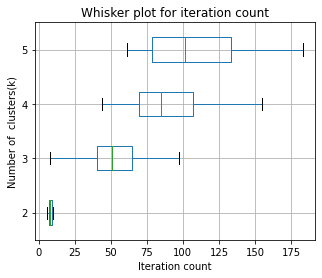

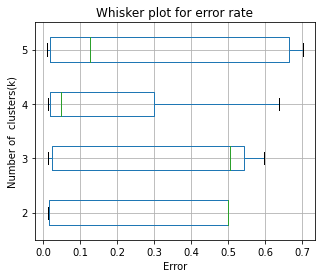

In [5]:
def expectation_maximization(X,n_samples,n_features,centers):
    P_of_C =[1/centers for i in range(centers)]
    covariance=[[[1 if i==j else 0 for i in range(n_features) ]for j in range(n_features)]for k in range(centers)]
    X_T=np.transpose(X)
    mu=[]
    for i in range(centers):
        j=random.randint(0,len(X)-1)
        mu.append(X[j])
    weight=[[0 for i in range(centers)] for j in range(n_samples)]
    mu_new=[[0 for i in range(n_features)] for j in range(centers)]
    mu_diff=[[0 for i in range(n_features)] for j in range(n_features)]
    counter=0
    mean_squared_error = 0
    error = 999
    epsilon=0.0001
    denom=[0 for i in range(centers)]
    counter=0
    while error > epsilon:
        temp=0
        for j in range(n_samples):
             for i in range(centers):
                likelihood = multivariate_normal.pdf(X[j],mean=mu[i],cov=covariance[i],allow_singular=True)
                #print("likelihood is",likelihood)
                weight[j][i]= likelihood * P_of_C[i]

        for j in range(n_samples):
                weight[j]= weight[j]/np.sum(weight[j])

        weight_transpose=np.transpose(weight)
        mu_new=np.dot(weight_transpose,X)
        for i in range(centers):
            mu_new[i]=mu_new[i]/np.sum(weight_transpose[i])
            P_of_C[i] = np.sum(weight_transpose[i])/n_samples
        
        for i in range(centers):
            temp=0
            for j in range(n_samples):
                mu_diff=np.subtract(X[j],mu[i]).reshape(n_features,1)
                mu_diff_T= np.reshape(mu_diff,(1,n_features))
                temp += weight[j][i] * np.dot(mu_diff,mu_diff_T)
            covariance[i] = temp / np.sum(weight_transpose[i])
            np.fill_diagonal(covariance[i],covariance[i].diagonal() + 0.0001)
        mean_squared_error = np.subtract(mu,mu_new)
    
        mu=copy.deepcopy(mu_new)
        mean_squared_error=np.square(mean_squared_error)
        error = np.sum(mean_squared_error)
        counter+=1   
    return weight,mu,counter


if __name__ == '__main__':
    df=pd.read_csv('/Users/abc/Desktop/IUB/B505/HW6/Dataset.data', sep="\s+",header=None)
    y=df.iloc[:,-1]
    y=np.array(y)
    df.drop(df.columns[len(df.columns)-1],axis=1, inplace=True)
    n_samples,n_features=df.shape
    X=np.array(df)
    set_good=[]
    set_bad=[]
    for i in range(len(X)):
        if y[i] == 0:
            set_good.append(X[i])
            
        else:
            set_bad.append(X[i])
    actual_mu_good=[]
    actual_mu_bad=[]
    actual_mu_good = np.mean(set_good,axis=0)
    actual_mu_bad = np.mean(set_bad,axis=0)
    final_iterations_list=[]
    final_error_list=[]
    for k in range(2,6):
        print("clusters=",k)
        
        error_list=[]
        iteration_list=[]
        for i in range(20):
            predicted_cluster_labels=[]
            weight,predicted_mu,iterations = expectation_maximization(X,n_samples,n_features,k)
            
            max_in_rows=np.argmax(weight,axis=1)
                
            for i in range(len(predicted_mu)):
                sum_of_squares=np.sum(np.square(actual_mu_good - predicted_mu[i]))
                euclidean_dist_good=np.sqrt(sum_of_squares)
                sum_of_squares=np.sum(np.square(actual_mu_bad - predicted_mu[i]))
                euclidean_dist_bad=np.sqrt(sum_of_squares)
                #print(euclidean_dist_good)
                #print(euclidean_dist_bad)
                if euclidean_dist_good <= euclidean_dist_bad:
                    predicted_cluster_labels.append([i,0])
                else:
                    predicted_cluster_labels.append([i,1])
            correct_labels_count=0
            incorrect_labels_count=0
            for i in range(n_samples):
                for j in range(k):
                    if max_in_rows[i] in predicted_cluster_labels[j]:
                        temp=predicted_cluster_labels[j]
                        if temp[1] == y[i]:
                            correct_labels_count += 1
                        else:
                            incorrect_labels_count += 1
            error_rate= incorrect_labels_count/(incorrect_labels_count+ correct_labels_count)
            error_list.append(error_rate)
            iteration_list.append(iterations)
        final_error_list.append(error_list)
        final_iterations_list.append(iteration_list)
    df = pd.DataFrame(final_iterations_list, index=[i for i in range(2,6)])
    df.T.boxplot(vert=False,showfliers=False)
    plt.subplots_adjust(left=0.25)
    plt.title('Whisker plot for iteration count')
    plt.xlabel("Iteration count")
    plt.ylabel("Number of  clusters(k)")
    plt.show()  
    df = pd.DataFrame(final_error_list, index=[i for i in range(2,6)])
    df.T.boxplot(vert=False)
    plt.subplots_adjust(left=0.25)
    plt.title('Whisker plot for error rate')
    plt.xlabel("Error")
    plt.ylabel("Number of  clusters(k)")
    plt.show()

 As we can see the plot shows a whisker plotting technique we have plotted no. of clusters vs. no. of iteration/error and we can clearly see that the mean of no of iteration is increasing for all values during convergence

# Problem 3.1:


In [3]:
# Used KMP algorithm to design the solution to the problem statement with prefix P and substring D 

# Normal KMP Algorithm returning number of matched patterns

def compute_kmp_fail(P):
    m = len(P)
    fail = [0] * m
    j = 1
    k = 0
    while j < m:
        if P[j] == P[k]:
            fail[j] = k+1
            j += 1
            k += 1
        elif k > 0:
            k = fail[k-1]
        else:
            j += 1
    return fail

def find_kmp(T, P):
    n, m = len(T), len(P)
    #print(n,m)
    if m == 0:
        return 0
    fail = compute_kmp_fail(P)
    j = 0
    k = 0
    maxi = 0
    while j < n:  # goes till end cause index starts from 0 and < n will make it go to n-1 index which is last element index value
        if T[j] == P[k]:
            if k == m-1:
                maxi = max(k+1,maxi)
                return maxi
            j += 1
            k += 1
            maxi=max(k,maxi)
        elif k > 0:
            k = 0
        else:
            j += 1
    return maxi

D = 'cdabscdcdcdcabyiok'
P = 'cdc'

print("longest length of prefix: ",find_kmp(D,P))

longest length of prefix:  3


# Problem 3.2:

<h3>X, Y, and Z are three arrays and each has m elements. For an arbitrary integer t, describe
O(m2logm)-time algorithm to determine if there exist numbers, x in X, y in Y, and z in Z, such
that t = x+y+z.</h3>

Algorithm:
def BinarySearch(data,target,low,high):
    if low>high: 
        return False 
    else: 
        mid = (low+high)//2 
    if target == mid of data
        return True
    elif target<data[mid]:
        return BinarySearch(data,target,low,mid-1)
    else:
        return BinarySearch(data,target,mid+1,high)

def triplet(target,array1, array2, array3):
    sort array3 # Used python's inbuilt sort method to sort the array
    initialize a set h

    for i in array1:
        for j in array2:
            subtract x[i] and y[j] from target
                if binary search function(array3,total,0,len(array3)-1) is true
                    return true
    return False
Explanation:
We first define a BinarySearch function.
In BinarySearch we compare the sorted array mid element to see which side of the list should we search.
Depending on the condition satisfied the algorithm will check the side that is required.
We now define a function to run in O(M^2 logM) time.
We implement two for loops one to toggle for array 1, second to toggle over array 2 and also subtract array 1 and array 2 from target.
We then call the binary function passing the remainder from above operation. if its present in array 3 then target = array1+arra2+array3
Time Complexity:
Sorting of array 3 - O(Mlogm) (python runs merge sort internally)
The two for loops take O(M ^ 2 ) in total together
Binary Sort takes O(logM ) time
We get O(M^2 logM + MlogM), we ignore second part cause highest degree is M^2 
Hence Total Time Complexity would be O(M^2 logM).

In [5]:
def binarySearch(data,target,low,high):
    if low>high:
        return False
    else:
        mid = (low + high)//2
    if target==data[mid]:
        return True
    elif target<data[mid]:
        return binarySearch(data,target,low,mid-1)
    else:
        return binarySearch(data,target,mid+1,high)

def triplet(target,x,y,z):
    z.sort()
    h = set()

    for i in x:
        for j in y:
            total = target - i -j
            if binarySearch(z,total,0,len(z)-1):
                return True
    return False


x, y, z = [0,2,3,4,5,6,7,1], [99,98,97,96,95,94,93,1], [11,12,13,14,15,16,17,1]
triplet(111,x,y,z)

True

#### Algorithm : 
```
target: node to be deleted
M: location where node is found
parent: parent is node before M


function Stringdelete (compressed trie, string ):
    search for string in compressed trie
    if string is not found in compressed trie:
        return False
    else
        Lets name the node where string is found to be M
        If M has a child or string is incomplete
            #we cannot delete M as its a internal node
            return False
         delete M 
         if parent has a child d:
             parent.string <- parent.string + d.string
             # Now that we have merged the two nodes we can delete the node now
             delete node d
         return True
        
```
#### Explaination :
* We defined a function that takes a compressed trie and string to be deleted as input. First we check if the string exists, if it doesnt then we return False as there is no need to check the trie any longer. <BR>
* Now if we found the string at a node we check that node to see if it has a child or not also if the string is complete.<BR> 
* We cannot delete an internal node, we lose data. Therefore we return False and exit. 
* If the earlier condition is not true we can proceed ahead with the deletion procedure and delete M. Then we proceed to merge the nodes so that it satisfies compressed trie requirement then we delete the child node.


                
                